## Introduction to Data Science

## The CRISP-DM approach to Data Science Tasks

_________________________

## I. Business Understanding
                    
#### The Business Understanding phase focuses on understanding the objectives and requirements of the project.  
+ Determine business objectives:   
+ Assess situation:  
+ Determine data mining goals:  
+ Produce project plan:  

### Bussiness objectives/Assess situations
Nossa base de dados consiste em informações da vida escolar e familiar de  mais de 300 alunos da região do Porto, Portugal, associando a cada um a chance destes beberem casualmente durante seu tempo livre, seja no fim de semana ou nos dias escolares.

Estas dependem de fatores como, notas escolares, relações familiares, acesso à internet e até mesmo tempo livre após as aulas, abrangindo um caráter socio-educativo à analise da questão em si.

Com estes dados, buscamos podem tentar enxergar uma relação e/ou tendência destas características particulares com a propenção destes alunos a consumirem álcool a uma idade mais jovem.

O estudo que propuremos terá como objetivo agrupar os alunos por categorias relacionadas a este consumo de álcool, com o objetivo de pensarmos em um hipotético projeto de prevenção do uso de drogas lícitas e ilícitas, considerando que muitas vezes este consumo serve de porta de entrada para outras drogas como cigarro, maconha e outras até mais problemáticas.


### Determine data mining goals
Nossos dados são provenientes no Kaggle:
[https://www.kaggle.com/uciml/student-alcohol-consumption]


### Produce project plan
Tentar encontrar correlações que, muitas vezes não se mostram óbvias, e tentar gerar o melhor modelo possível filtrando as diferentes informações que temos.



## II. Data Understanding  

+ Collect initial data:  
+ Describe data:  
+ Explore data:  
+ Verify data quality:  

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carregando os dados a partir do csv
data = pd.read_csv("data/student-mat.csv")

In [121]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


### Descrição detalhada dos dados

| Collumn   |      Description      |  Range |
|----------|:-------------:|------:|
| school |  student's school | binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira |
| sex    | student's sex | binary: 'F' - female or 'M' - male|
| address | student's home address type |    binary: 'U' - urban or 'R' - rural |
| famsize |  family size | (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) |
| Pstatus |    parent's cohabitation status | binary: 'T' - living together or 'A' - apart |
| Medu | mother's education |    numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education|
| Fedu |  father's education   |   numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education |
| Mjob |    mother's job   |   nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other' |
| Fjob | father's job |    nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other' |
| reason | reason to choose this school |    nominal: close to 'home', school 'reputation', 'course' preference or 'other' |
| guardian | student's guardian |    nominal: 'mother', 'father' or 'other' |
| traveltime | home to school travel time |    numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour |
| studytime | weekly study time |    numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours |
| failures | number of past class failures |    numeric: n if 1<=n<3, else 4 |
| schoolsup | extra educational support |    (binary: yes or no) |
| famsup | family educational support |    binary: yes or no |
| paid | extra paid classes within the course subject (Math or Portuguese) |    binary: yes or no |
| activities | extra-curricular activities |    binary: yes or no |
| nursery | attended nursery school |    binary: yes or no |
| higher | wants to take higher education |    binary: yes or no |
| internet | Internet access at home |    binary: yes or no |
| romantic | with a romantic relationship |    binary: yes or no |
| famrel | quality of family relationships |    numeric: from 1 - very bad to 5 - excellent |
| freetime | free time after school |    numeric: from 1 - very low to 5 - very high |
| goout | going out with friends |    numeric: from 1 - very low to 5 - very high |
| Dalc | workday alcohol consumption |    numeric: from 1 - very low to 5 - very high |
| Walc | weekend alcohol consumption |    numeric: from 1 - very low to 5 - very high |
| health | current health status |    numeric: from 1 - very bad to 5 - very good |
| absences | number of school absences |    numeric: from 0 to 93 |
| G1 | first period grade |    numeric: from 0 to 20 |
| G2 | second period grade |    numeric: from 0 to 20 |
| G3 | final grade |    numeric: from 0 to 20, output target |


### Análise preliminar dos dados

Em análise inicial observamos uma base consistente. Não há dados faltantes nem de tipo incompatível com a descrição.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Estatística descritiva

In [45]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Alguns plots

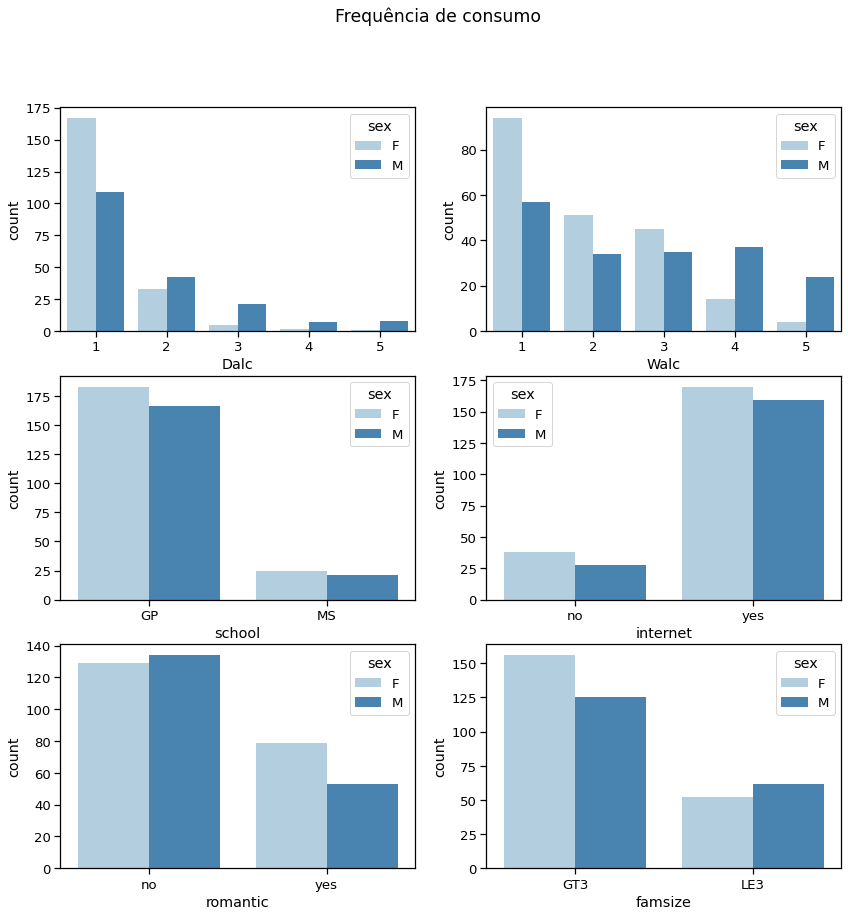

In [72]:
f, axes = plt.subplots(3, 2, figsize=(14, 14), facecolor='white')
f.suptitle('Frequência de consumo')
ax1 = sns.countplot(x="Dalc", data=data, hue="sex", palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="Walc", data=data, hue="sex", palette="Blues", ax=axes[0,1])
ax3 = sns.countplot(x="school", data=data, hue="sex", palette="Blues", ax=axes[1,0])
ax4 = sns.countplot(x="internet", data=data, hue="sex", palette="Blues", ax=axes[1,1])
ax5 = sns.countplot(x="romantic", data=data, hue="sex", palette="Blues", ax=axes[2,0])
ax6 = sns.countplot(x="famsize", data=data, hue="sex", palette="Blues", ax=axes[2,1])

Notamos que há alguns clusters de correlação.

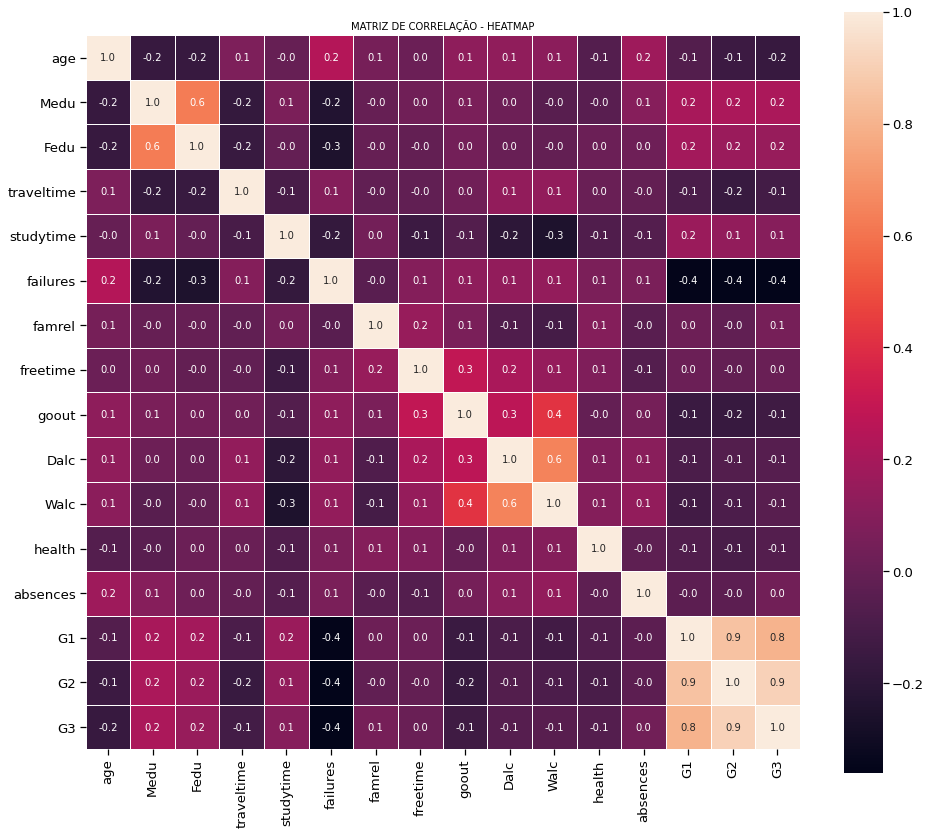

In [107]:
corr = data.corr() 
f,ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

plt.title('MATRIZ DE CORRELAÇÃO - HEATMAP', size=10);

## III. Data Preparation

+ Select data:   
+ Clean data:   
+ Construct data/transform data/feature engineering:   
+ Integrate data:   
+ (Re) Format data:   

Estamos interessados em transformar os dados categóricos em numéricos para que possamos alimentar o modelo.
Logo vamos 'dummizar' as features categóricas.

In [60]:
pd.set_option('display.max_columns', None)
clean_data = pd.get_dummies(data, drop_first=True)

In [137]:
clean_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


Estas duas colunas foram escolhidas como candidatas à labels e, como possuem um range de 1 até 5, sendo estes a chance de beber durante semana (Dalc) e fim de semana (Walc) dos alunos, separamos os ranges de 1 a 2 como "0", no qual estes vão ser entendidos como pessoas que não bebem ou não demonstram risco de uso não moderado de álcool, e range 3 a 5 como "1", no qual estes vão ser entendidos como pessoas mais propensas a consumir álcool no geral: de forma moderada e não moderada.

In [138]:
dalc = clean_data.copy()
walc = clean_data.copy()

dalc.loc[(dalc.Dalc < 3), 'Dalc' ] = 0 
dalc.loc[(dalc.Dalc >= 3), 'Dalc' ] = 1 

walc.loc[(walc.Walc < 3), 'Walc' ] = 0 
walc.loc[(walc.Walc >= 3), 'Walc' ] = 1 

Então temos os dados preparados à forma que precisamos para começar a modelar.

In [135]:
dalc

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,0,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,0,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,0,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,0,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,0,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,1,5,4,11,9,9,9,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,1,4,2,3,14,16,16,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,1,3,3,3,10,8,7,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,1,4,5,0,11,12,10,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


## IV. Modeling

+ Select modeling techniques: 
+ Generate test design: 
+ Build model: 
+ Assess model:  

## V. Evaluation                    

+ Evaluate results: 
+ Review process: 
+ Determine next steps: 

## VI. Deployment

+ Plan deployment: 
+ Plan monitoring and maintenance: 
+ Produce final report: 
+ Review project: 